In [32]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVC
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_text
%matplotlib inline 
sns.set(style="ticks")
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('./diamonds.csv')
dataset.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [38]:
dataset = dataset[:2000]
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    1000 non-null   float64
 1   cut      1000 non-null   int64  
 2   color    1000 non-null   int64  
 3   clarity  1000 non-null   int64  
 4   depth    1000 non-null   float64
 5   table    1000 non-null   float64
 6   price    1000 non-null   float64
 7   'x'      1000 non-null   float64
 8   'y'      1000 non-null   float64
 9   'z'      1000 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 78.2 KB


In [19]:
dataset.cut.replace("b'Fair'",1,inplace=True)
dataset.cut.replace("b'Good'",2,inplace=True)
dataset.cut.replace("b'Very Good'",3,inplace=True)
dataset.cut.replace("b'Ideal'",4,inplace=True)
dataset.cut.replace("b'Premium'",5,inplace=True)
dataset.clarity.replace("b'I1'",1,inplace=True)
dataset.clarity.replace("b'IF'",2,inplace=True)
dataset.clarity.replace("b'SI1'",3,inplace=True)
dataset.clarity.replace("b'SI2'",4,inplace=True)
dataset.clarity.replace("b'VS1'",5,inplace=True)
dataset.clarity.replace("b'VS2'",6,inplace=True)
dataset.clarity.replace("b'VVS1'",7,inplace=True)
dataset.clarity.replace("b'VVS2'",8,inplace=True)
dataset.color.replace("b'J'",1,inplace=True)
dataset.color.replace("b'I'",2,inplace=True)
dataset.color.replace("b'H'",3,inplace=True)
dataset.color.replace("b'G'",4,inplace=True)
dataset.color.replace("b'F'",5,inplace=True)
dataset.color.replace("b'E'",6,inplace=True)
dataset.color.replace("b'D'",7,inplace=True)

<AxesSubplot: >

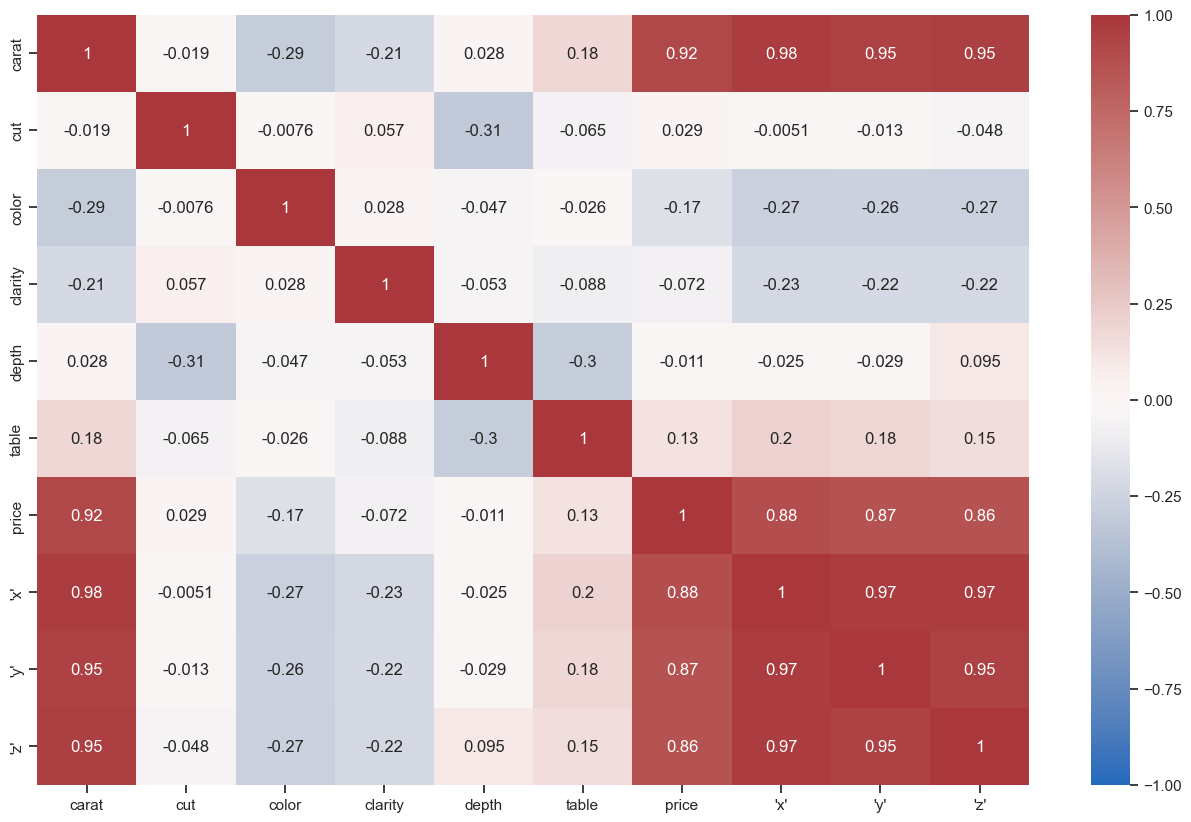

In [5]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),annot=True, vmin=-1.0, vmax = 1.0,cmap = "vlag")

In [39]:
shuffled = dataset.sample(frac=1)
x = shuffled.iloc[:, [0,1,2,3,4,5,7,8,9]].values
y = shuffled.iloc[:, 6].values
x


array([[0.71, 4.  , 4.  , ..., 5.74, 5.78, 3.54],
       [0.72, 3.  , 5.  , ..., 5.69, 5.73, 3.6 ],
       [0.26, 3.  , 7.  , ..., 4.03, 4.12, 2.53],
       ...,
       [0.82, 4.  , 3.  , ..., 6.01, 6.08, 3.72],
       [0.7 , 3.  , 6.  , ..., 5.65, 5.67, 3.55],
       [0.81, 5.  , 4.  , ..., 5.87, 5.81, 3.68]])

In [24]:
y

array([2782.,  556., 2830.,  404., 2768.,  556., 2789., 2880.,  357.,
       2838., 2816., 2861., 2805., 2843.,  556., 2863., 2782., 2831.,
       2858., 2829., 2762., 2840., 2800., 2812., 2885., 2846.,  403.,
       2793., 2862.,  402., 2808., 2850., 2793., 2829., 2793., 2840.,
        557., 2863., 2838., 2822., 2777., 2878., 2873.,  403., 2802.,
       2806., 2777., 2792., 2871., 2808., 2800., 2789.,  554., 2841.,
       2854., 2774., 2780., 2862., 2770.,  556., 2780., 2850., 2805.,
       2797., 2859., 2863., 2872., 2872., 2800., 2851., 2812., 2773.,
       2761., 2826., 2776., 2795., 2854., 2862., 2844., 2877., 2867.,
       2896., 2808., 2804., 2893., 2832., 2857., 2827., 2882., 2822.,
        557., 2832.,  554., 2867., 2801., 2797.,  355., 2863.,  552.,
       2873., 2877., 2894., 2838., 2815., 2839., 2795., 2894., 2823.,
       2789., 2782., 2815., 2857., 2776.,  557., 2807., 2792.,  554.,
       2792., 2800., 2872., 2873., 2879.,  554., 2827., 2822., 2760.,
       2804., 2795.,

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True)

In [49]:
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred_test_linear = linear.predict(x_test)
y_pred_train_linear = linear.predict(x_train)
res1r = r2_score(y_train, y_pred_train_linear), r2_score(y_test, y_pred_test_linear)
res1mae = mean_absolute_error(y_train, y_pred_train_linear), mean_absolute_error(y_test, y_pred_test_linear)
res1 = res1r,res1mae
res1

((0.9442567106202544, 0.9313838883516552),
 (140.10324453660502, 163.8371508878031))

In [10]:
# svc = SVC(kernel = "sigmoid")
# svc = svc.fit(x_train, y_train)
# y_pred_test_svc = svc.predict(x_test)
# y_pred_train_svc = svc.predict(x_train)
# res2 = r2_score(y_train, y_pred_train_svc), r2_score(y_test, y_pred_test_svc)
# res2 

In [52]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train, y_train)
y_pred_test_tree = tree.predict(x_test)
y_pred_train_tree = tree.predict(x_train)
res3r = r2_score(y_train, y_pred_train_tree), r2_score(y_test, y_pred_test_tree)
res3mae = mean_absolute_error(y_train, y_pred_train_tree), mean_absolute_error(y_test, y_pred_test_tree)
res3mse = mean_squared_error(y_train, y_pred_train_tree), mean_squared_error(y_test, y_pred_test_tree)
res3 = res3r,res3mae, res3mse
res3

((1.0, 0.9956277979152469), (0.0, 41.545), (0.0, 3118.915))

In [33]:
tree_rules = export_text(tree, feature_names=list(dataset.iloc[:, [0,1,2,3,4,5,7,8,9]].columns))
HTML('<pre>' + tree_rules + '</pre>')

In [50]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

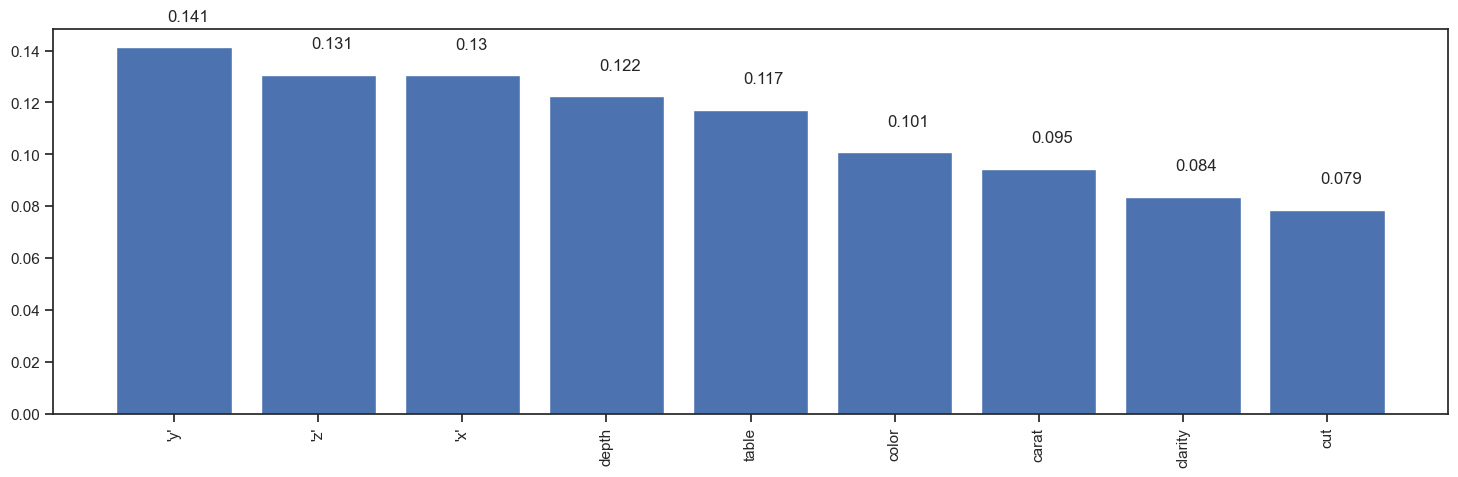

In [51]:
fl, fd = draw_feature_importances(tree, dataset.iloc[:, [0,1,2,3,4,5,7,8,9]])